# scrappinggg

In [ ]:
pip install google-play-scraper pandas openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import reviews, Sort
import pandas as pd

# Scraping ulasan aplikasi LinkAja
app_id = "com.telkom.mwallet"

# Ambil ulasan terbaru
result, _ = reviews(
    app_id,
    lang="id",
    country="id",
    sort=Sort.NEWEST,
    count=2000
)

# Konversi ke DataFrame
df = pd.DataFrame(result)

# Pilih kolom yang relevan
df = df[['userName', 'score', 'at', 'content']]

# === Filter berdasarkan tanggal (November 2023 – Mei 2024) ===
start_date = pd.to_datetime("2024-11-01")
end_date = pd.to_datetime("2025-05-29")

df_filtered = df[(df['at'] >= start_date) & (df['at'] <= end_date)]

# Simpan hasil filter ke Excel
df_filtered.to_excel("ulasan_linkaja.xlsx", index=False)

print(f"Scraping selesai! Data difilter dan disimpan ({len(df_filtered)} ulasan) ✅")



Scraping selesai! Data difilter dan disimpan (2000 ulasan) ✅


In [ ]:
data = pd.read_excel('/content/ulasan_linkaja (4).xlsx')
data.head(10)

,userName,score,at,content
0,Boskecil 1994,5,2025-05-28 12:00:54,sangat lah puas
1,Noazha Hc,2,2025-05-28 10:17:59,"payah ,mahal2 hrgaya"
2,Henzo,1,2025-05-28 09:46:22,saya biasanya beli saldo steam terus OTP ke Wh...
3,Junaidi Junaidi,1,2025-05-28 09:08:12,saldo pending sampe sekarang belom masuk udah ...
4,MINQ channel ideas,5,2025-05-28 05:50:48,nah kl login nya enak gini kan dapet bintang 5🙏
5,Ju One,1,2025-05-28 04:48:56,Sangat membantu
6,angga nadia,2,2025-05-28 02:23:23,kecewa link aja buat transaksi kode briva bisa...
7,Biro Jasa,1,2025-05-27 21:27:04,apk parah nihhh.... saldoku kok menghilang.......
8,Riang Susanto,5,2025-05-27 15:46:08,semoga tetap bermanfaat sampai tingkat keatas ...
9,Tabri,1,2025-05-27 14:37:55,sangat kecewa Pulsa international ke TnG saldo...


In [ ]:
import pandas as pd

# Membaca data
data = pd.read_excel('ulasan_linkaja.xlsx')

# Memahami data
print("Data sebelum di-drop:")
print(data.head())

# Menghapus kolom yang tidak dibutuhkan
data = data.drop(columns=['userName', 'at'])

# Menghapus data kosong
data = data.dropna()

# Menghapus data duplikat berdasarkan seluruh kolom
data = data.drop_duplicates(subset='content', keep='first')

# Menampilkan data setelah pembersihan
print("\nData setelah di-drop dan dihapus duplikat:")
print(data.head())

# Menyimpan hasil ke file baru
data.to_excel('linkaja_reviews_cleaned_fixx.xlsx', index=False)
print("\nFile yang telah diubah telah disimpan sebagai 'linkaja_reviews_cleaned_fixx.xlsx'")


Data sebelum di-drop:
             userName  score                  at  \
0       Boskecil 1994      5 2025-05-28 12:00:54   
1           Noazha Hc      2 2025-05-28 10:17:59   
2               Henzo      1 2025-05-28 09:46:22   
3     Junaidi Junaidi      1 2025-05-28 09:08:12   
4  MINQ channel ideas      5 2025-05-28 05:50:48   

                                             content  
0                                    sangat lah puas  
1                               payah ,mahal2 hrgaya  
2  saya biasanya beli saldo steam terus OTP ke Wh...  
3  saldo pending sampe sekarang belom masuk udah ...  
4    nah kl login nya enak gini kan dapet bintang 5🙏  

Data setelah di-drop dan dihapus duplikat:
   score                                            content
0      5                                    sangat lah puas
1      2                               payah ,mahal2 hrgaya
2      1  saya biasanya beli saldo steam terus OTP ke Wh...
3      1  saldo pending sampe sekarang belom masuk 

In [ ]:
data = pd.read_excel('linkaja_reviews_cleaned_fixx.xlsx')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   score    1797 non-null   int64 
 1   content  1797 non-null   object
dtypes: int64(1), object(1)
memory usage: 28.2+ KB
None


In [ ]:
df.head(10)

,score,content
0,5,sangat lah puas
1,2,"payah ,mahal2 hrgaya"
2,1,saya biasanya beli saldo steam terus OTP ke Wh...
3,1,saldo pending sampe sekarang belom masuk udah ...
4,5,nah kl login nya enak gini kan dapet bintang 5🙏
5,1,Sangat membantu
6,2,kecewa link aja buat transaksi kode briva bisa...
7,1,apk parah nihhh.... saldoku kok menghilang.......
8,5,semoga tetap bermanfaat sampai tingkat keatas ...
9,1,sangat kecewa Pulsa international ke TnG saldo...


# preprocessing

In [ ]:
!pip install nltk
!pip install Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import nltk

# Unduh stopwords NLTK
nltk.download('stopwords')

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_excel('linkaja_reviews_cleaned_fixxx.xlsx')

In [ ]:
stop_words = set(stopwords.words('indonesian'))

# custom stopwords
custom_stopwords = {'kayak', 'dong', 'nih', 'deh', 'gitu', 'sih', 'loh', 'nya', 'hadeh','kasar','huft','wk','ah','hah','huh','woi','nah','an','ik','lah','halah',}
stop_words.update(custom_stopwords)

# Pertahankan kata penting
kata_penting = {'tidak', 'bukan', 'belum', 'jangan', 'tanpa', 'kurang', 'bisa', 'banget', 'terbaik','ajukan','baik'}
stop_words.difference_update(kata_penting)


# ✅ KATA-KATA YANG TIDAK BOLEH DISTEMMING
kata_tidak_distem = {'melakukan', 'mengubah', 'pengalaman', 'penyimpanan', 'pembayaran','pelayanan','ulasan','perhatikan'}

In [ ]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', ' ', str(text))         # Hapus simbol dan angka
    text = re.sub(r'(\d)x(\d)', ' ', text)                # Hapus 1x24 pattern
    text = re.sub(r'\s+', ' ', text)                      # Spasi ganda → satu
    text = re.sub(r'\b[h,i,j,l,m,o,s,t,x]\b', '', text)   # Hapus huruf tunggal
    return text.strip().lower()

# Terapkan fungsi ke kolom 'content'
df['cleaning_casefolding'] = df['content'].apply(clean_text)
df[['content','cleaning_casefolding']].head()

,content,cleaning_casefolding
0,sangat lah puas,sangat lah puas
1,"payah ,mahal2 hrgaya",payah mahal hrgaya
2,saya biasanya beli saldo steam terus OTP ke Wh...,saya biasanya beli saldo steam terus otp ke wh...
3,saldo pending sampe sekarang belom masuk udah ...,saldo pending sampe sekarang belom masuk udah ...
4,nah kl login nya enak gini kan dapet bintang 5🙏,nah kl login nya enak gini kan dapet bintang


In [ ]:
normalisasi_dict = {}

with open('/content/kamus_normalisasi.txt', 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) == 2:
            typo, formal = parts
            normalisasi_dict[typo.lower()] = formal.lower()
            normalisasi_dict[formal.lower()] = formal.lower()  # bentuk formal tetap formal

# Fungsi normalisasi
def normalisasi(text):
    tokens = text.split()
    tokens_norm = [normalisasi_dict.get(token, token) for token in tokens]
    return ' '.join(tokens_norm)

# Terapkan normalisasi ke kolom hasil pembersihan sebelumnya
df['normalisasi'] = df['cleaning_casefolding'].apply(normalisasi)

# Tampilkan 5 hasil teratas
df[['cleaning_casefolding','normalisasi']].head()

,cleaning_casefolding,normalisasi
0,sangat lah puas,sangat lah puas
1,payah mahal hrgaya,payah mahal harga
2,saya biasanya beli saldo steam terus otp ke wh...,saya biasa beli saldo steam terus otp ke whats...
3,saldo pending sampe sekarang belom masuk udah ...,saldo pending sampai sekarang belum masuk suda...
4,nah kl login nya enak gini kan dapet bintang,nah kalau login nya enak begini kan dapat bintang


In [ ]:
# Fungsi tokenisasi
def tokenizing(text):
    return re.findall(r'\b\w+\b', text)

# Terapkan tokenisasi ke kolom hasil normalisasi
df['tokenizing'] = df['normalisasi'].apply(tokenizing)

# Tampilkan 5 hasil teratas
df[['normalisasi','tokenizing']].head()

,normalisasi,tokenizing
0,sangat lah puas,"[sangat, lah, puas]"
1,payah mahal harga,"[payah, mahal, harga]"
2,saya biasa beli saldo steam terus otp ke whats...,"[saya, biasa, beli, saldo, steam, terus, otp, ..."
3,saldo pending sampai sekarang belum masuk suda...,"[saldo, pending, sampai, sekarang, belum, masu..."
4,nah kalau login nya enak begini kan dapat bintang,"[nah, kalau, login, nya, enak, begini, kan, da..."


In [ ]:
def stemming(tokens):
    hasil = []
    for token in tokens:
        if token in kata_tidak_distem:
            hasil.append(token)
        else:
            hasil.append(stemmer.stem(token))
    return hasil

df['stemming'] = df['tokenizing'].apply(stemming)


df[['tokenizing','stemming']].head()

,tokenizing,stemming
0,"[sangat, lah, puas]","[sangat, lah, puas]"
1,"[payah, mahal, harga]","[payah, mahal, harga]"
2,"[saya, biasa, beli, saldo, steam, terus, otp, ...","[saya, biasa, beli, saldo, steam, terus, otp, ..."
3,"[saldo, pending, sampai, sekarang, belum, masu...","[saldo, pending, sampai, sekarang, belum, masu..."
4,"[nah, kalau, login, nya, enak, begini, kan, da...","[nah, kalau, login, nya, enak, begini, kan, da..."


In [ ]:
def filtering(tokens):
    return [token for token in tokens if token not in stop_words]

df['filtering'] = df['stemming'].apply(filtering)

df[['stemming','filtering']].head()

,stemming,filtering
0,"[sangat, lah, puas]",[puas]
1,"[payah, mahal, harga]","[payah, mahal, harga]"
2,"[saya, biasa, beli, saldo, steam, terus, otp, ...","[beli, saldo, steam, otp, whatsapp, beli, otp,..."
3,"[saldo, pending, sampai, sekarang, belum, masu...","[saldo, pending, belum, masuk, langgan, servis..."
4,"[nah, kalau, login, nya, enak, begini, kan, da...","[login, enak, bintang]"


In [ ]:
df['ulasan_bersih'] = df['filtering'].apply(lambda x: ' '.join(x))

df[['ulasan_bersih']].head()

,ulasan_bersih
0,puas
1,payah mahal harga
2,beli saldo steam otp whatsapp beli otp gagal k...
3,saldo pending belum masuk langgan servis tidak
4,login enak bintang


In [ ]:
df.to_excel('/content/ulasan_linkaja_preprocessed_fixxx.xlsx', index=False)

In [ ]:
data = pd.read_excel('ulasan_linkaja_preprocessed_fixxx.xlsx')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   score                 1797 non-null   int64 
 1   content               1797 non-null   object
 2   cleaning_casefolding  1787 non-null   object
 3   normalisasi           1787 non-null   object
 4   tokenizing            1797 non-null   object
 5   stemming              1797 non-null   object
 6   filtering             1797 non-null   object
 7   ulasan_bersih         1778 non-null   object
dtypes: int64(1), object(7)
memory usage: 112.4+ KB
None


In [ ]:
data = pd.read_excel('ulasan_linkaja_preprocessed_fixxx.xlsx')
data = data.dropna()
data = data.drop_duplicates(subset='ulasan_bersih', keep='first')
data.to_excel('ulasan_linkaja_preprocessed_bersihh.xlsx', index=False)


data = pd.read_excel('ulasan_linkaja_preprocessed_bersihh.xlsx')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   score                 1648 non-null   int64 
 1   content               1648 non-null   object
 2   cleaning_casefolding  1648 non-null   object
 3   normalisasi           1648 non-null   object
 4   tokenizing            1648 non-null   object
 5   stemming              1648 non-null   object
 6   filtering             1648 non-null   object
 7   ulasan_bersih         1648 non-null   object
dtypes: int64(1), object(7)
memory usage: 103.1+ KB
None


In [ ]:
df.head(20)

,score,content,cleaning_casefolding,normalisasi,tokenizing,stemming,filtering,ulasan_bersih
0,5,sangat lah puas,sangat lah puas,sangat lah puas,"[sangat, lah, puas]","[sangat, lah, puas]",[puas],puas
1,2,"payah ,mahal2 hrgaya",payah mahal hrgaya,payah mahal harga,"[payah, mahal, harga]","[payah, mahal, harga]","[payah, mahal, harga]",payah mahal harga
2,1,saya biasanya beli saldo steam terus OTP ke Wh...,saya biasanya beli saldo steam terus otp ke wh...,saya biasa beli saldo steam terus otp ke whats...,"[saya, biasa, beli, saldo, steam, terus, otp, ...","[saya, biasa, beli, saldo, steam, terus, otp, ...","[beli, saldo, steam, otp, whatsapp, beli, otp,...",beli saldo steam otp whatsapp beli otp gagal k...
3,1,saldo pending sampe sekarang belom masuk udah ...,saldo pending sampe sekarang belom masuk udah ...,saldo pending sampai sekarang belum masuk suda...,"[saldo, pending, sampai, sekarang, belum, masu...","[saldo, pending, sampai, sekarang, belum, masu...","[saldo, pending, belum, masuk, langgan, servis...",saldo pending belum masuk langgan servis tidak
4,5,nah kl login nya enak gini kan dapet bintang 5🙏,nah kl login nya enak gini kan dapet bintang,nah kalau login nya enak begini kan dapat bintang,"[nah, kalau, login, nya, enak, begini, kan, da...","[nah, kalau, login, nya, enak, begini, kan, da...","[login, enak, bintang]",login enak bintang
5,1,Sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]","[sangat, bantu]",[bantu],bantu
6,2,kecewa link aja buat transaksi kode briva bisa...,kecewa link aja buat transaksi kode briva bisa...,kecewa link aja buat transaksi kode briva bisa...,"[kecewa, link, aja, buat, transaksi, kode, bri...","[kecewa, link, aja, buat, transaksi, kode, bri...","[kecewa, link, aja, transaksi, kode, briva, bi...",kecewa link aja transaksi kode briva bisa kali...
7,1,apk parah nihhh.... saldoku kok menghilang.......,apk parah nihhh saldoku kok menghilang padahal...,aplikasi parah nih saldo kok hilang padahal du...,"[aplikasi, parah, nih, saldo, kok, hilang, pad...","[aplikasi, parah, nih, saldo, kok, hilang, pad...","[aplikasi, parah, saldo, hilang, percaya, gara...",aplikasi parah saldo hilang percaya gara konek...
8,5,semoga tetap bermanfaat sampai tingkat keatas ...,semoga tetap bermanfaat sampai tingkat keatas ...,semoga tetap bermanfaat sampai tingkat atas la...,"[semoga, tetap, bermanfaat, sampai, tingkat, a...","[moga, tetap, manfaat, sampai, tingkat, atas, ...","[moga, manfaat, tingkat, kembang, maju, fitur,...",moga manfaat tingkat kembang maju fitur aplika...
9,1,sangat kecewa Pulsa international ke TnG saldo...,sangat kecewa pulsa international ke tng saldo...,sangat kecewa pulsa international ke tng saldo...,"[sangat, kecewa, pulsa, international, ke, tng...","[sangat, kecewa, pulsa, international, ke, tng...","[kecewa, pulsa, international, tng, saldo, pot...",kecewa pulsa international tng saldo potong to...


wordcloud

In [ ]:
pip install pandas openpyxl wordcloud matplotlib


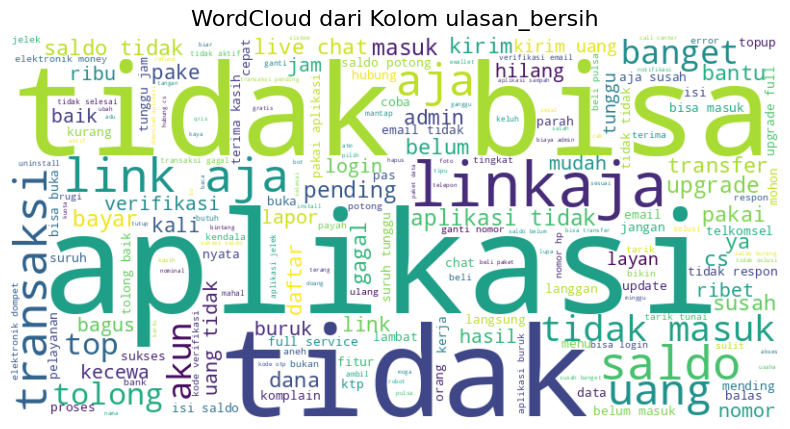

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Baca file Excel (.xlsx)
df = pd.read_excel("ulasan_linkaja_preprocessed_bersihhh.xlsx")  # Ganti dengan nama file kamu

# Gabungkan semua teks dari kolom 'ulasan_bersih'
teks = ' '.join(df['ulasan_bersih'].dropna().astype(str))

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(teks)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud dari Kolom ulasan_bersih", fontsize=16)
plt.show()


# labelling

In [ ]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Inisialisasi VADER
analyzer = SentimentIntensityAnalyzer()

# Load data
df = pd.read_excel('/content/ulasan_linkaja_preprocessed_bersihh.xlsx')

custom_lexicon = {
    'enak': 2.0,
    'mudah':1.5,
    'puas': 2.0,
    'nyaman': 2.0,
    'mantap': 2.0,
    'bagus': 2.0,
    'baik': 1.5,
    'cepat': 1.5,
    'keren': 2.0,
    'luar biasa': 2.5,
    'top': 2.0,
    'bantu': 1.5,
    'buruk': -2.5,
    'jelek': -2.0,
    'lambat': -1.5,
    'parah': -2.5,
    'error': -2.0,
    'gagal': -2.0,
    'kecewa': -2.5,
    'susah': -1.5,
    'mahal': -2.0,
    'pending': -1.0,
    'kurang':-2.0,
    'belum':-2.0,
    'tidak':-2.0,
    'kocak': -1.0,
    'payah':-1.5
}
analyzer.lexicon.update(custom_lexicon)

# 4. Fungsi pelabelan
def get_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']
    label = 'positif' if score > 0 else 'negatif'
    return label

# Terapkan fungsi
df['label_sentimen'] = df['ulasan_bersih'].apply(get_sentiment)


# Simpan hasil
df[['score','ulasan_bersih','label_sentimen']].to_excel('/content/ulasan_linkaja_label.xlsx', index=False)

# Lihat hasil
df[['ulasan_bersih', 'label_sentimen']].head()


,ulasan_bersih,label_sentimen
0,puas,positif
1,payah mahal harga,negatif
2,beli saldo steam otp whatsapp beli otp gagal k...,negatif
3,saldo pending belum masuk langgan servis tidak,negatif
4,login enak bintang,positif


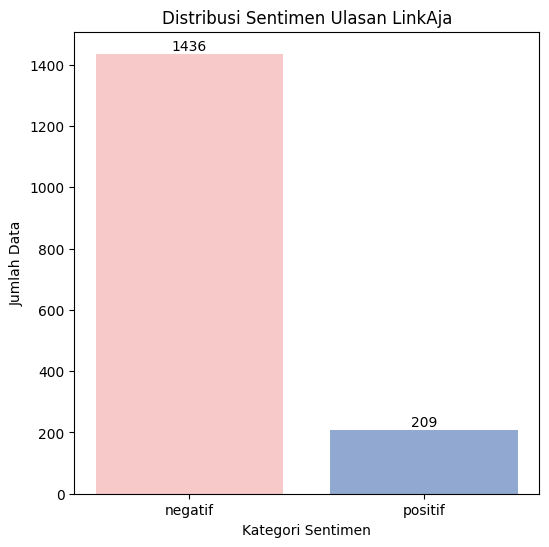

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file Excel
file_path = '/content/ulasan_linkaja_label&manualll.xlsx'  # ganti dengan path file milikmu
df = pd.read_excel(file_path)

# Hitung jumlah tiap kategori sentimen
jumlah_data = df['label_sentimen'].value_counts()

# Membuat diagram batang
plt.figure(figsize=(6, 6))
plt.bar(jumlah_data.index, jumlah_data.values, color=['#F7CAC9', '#91A8D0'])
plt.title('Distribusi Sentimen Ulasan LinkAja')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Data')

# Menampilkan nilai di atas batang
for i, v in enumerate(jumlah_data.values):
    plt.text(i, v + 10, str(v), ha='center')

plt.show()


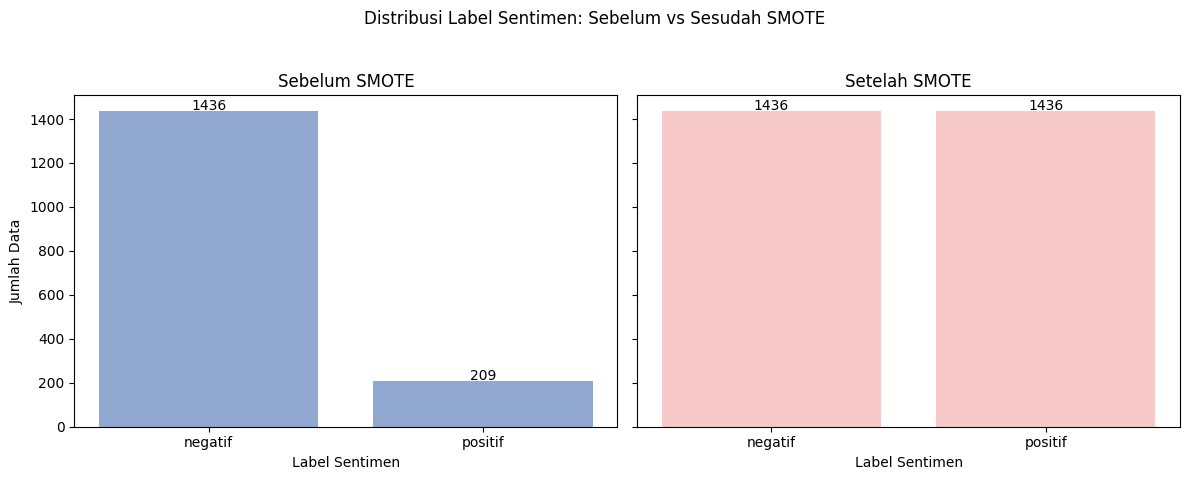

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Baca file
df = pd.read_excel("ulasan_linkaja_label&manualll.xlsx")

# Ambil teks dan label
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
label_names = le.classes_

# TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(texts)

# Distribusi sebelum SMOTE
label_counts_before = pd.Series(y_encoded).value_counts().sort_index()

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_encoded)

# Distribusi setelah SMOTE
label_counts_after = pd.Series(y_resampled).value_counts().sort_index()

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Sebelum SMOTE
axes[0].bar(label_names, label_counts_before, color='#91A8D0')
axes[0].set_title('Sebelum SMOTE')
axes[0].set_xlabel('Label Sentimen')
axes[0].set_ylabel('Jumlah Data')
for i, val in enumerate(label_counts_before):
    axes[0].text(i, val + 3, str(val), ha='center')

# Setelah SMOTE
axes[1].bar(label_names, label_counts_after, color='#F7CAC9')
axes[1].set_title('Setelah SMOTE')
axes[1].set_xlabel('Label Sentimen')
for i, val in enumerate(label_counts_after):
    axes[1].text(i, val + 3, str(val), ha='center')

# Tampilan akhir
plt.suptitle('Distribusi Label Sentimen: Sebelum vs Sesudah SMOTE')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
data = pd.read_excel('/content/ulasan_linkaja_label&manuall.xlsx')
data = data.dropna()
data = data.drop_duplicates(subset='ulasan_bersih', keep='first')
data.to_excel('ulasan_linkaja_label&manualll.xlsx', index=False)


data = pd.read_excel('ulasan_linkaja_label&manualll.xlsx')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   score           1645 non-null   int64 
 1   ulasan_bersih   1645 non-null   object
 2   label_sentimen  1645 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.7+ KB
None


Index(['score', 'ulasan_bersih', 'label_sentimen'], dtype='object')


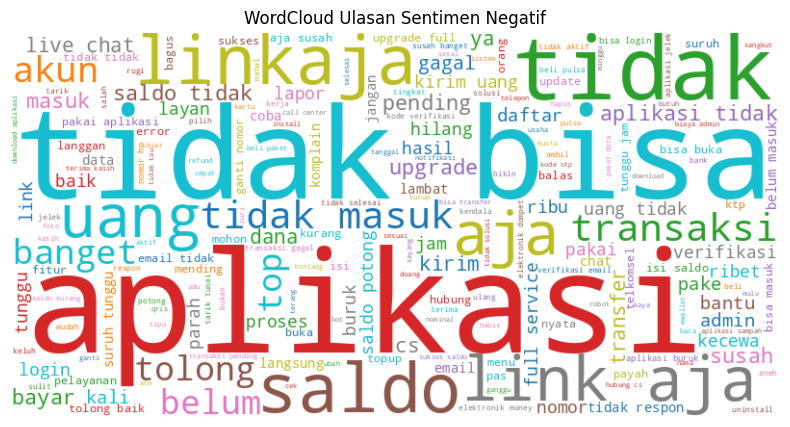

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load file Excel
file_path = '/content/ulasan_linkaja_label&manualll.xlsx'
df = pd.read_excel(file_path)

# Tampilkan nama kolom untuk memastikan
print(df.columns)

# Pastikan kolom label dan teks bersih benar
# Misal: kolom teks = 'ulasan_bersih', kolom label = 'label_sentimen'
# Filter hanya sentimen negatif
df_negatif = df[df['label_sentimen'] == 'negatif']

# Gabungkan semua teks ulasan negatif
text_negatif = ' '.join(df_negatif['ulasan_bersih'].astype(str))

# Buat WordCloud dengan colormap yang lebih kontras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='tab10'
).generate(text_negatif)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Ulasan Sentimen Negatif")
plt.show()


Index(['score', 'ulasan_bersih', 'label_sentimen'], dtype='object')


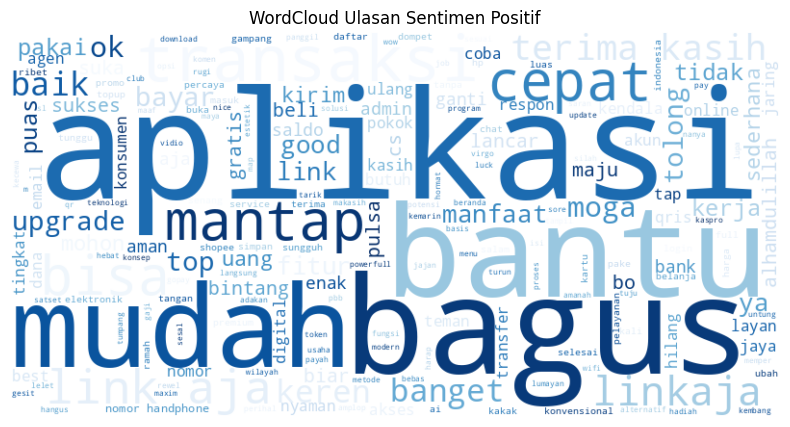

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load file Excel
file_path = '/content/ulasan_linkaja_label&manualll.xlsx'
df = pd.read_excel(file_path)

# Tampilkan nama kolom untuk memastikan
print(df.columns)

# Pastikan kolom label dan teks bersih benar
# Misal: kolom teks = 'ulasan_bersih', kolom label = 'label_sentimen'
# Filter hanya sentimen positif
df_positif = df[df['label_sentimen'] == 'positif']

# Gabungkan semua teks ulasan positif
text_positif = ' '.join(df_positif['ulasan_bersih'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text_positif)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Ulasan Sentimen Positif")
plt.show()

# SVM & KNN K-FOLD CROSSVALIDATION

In [ ]:
!pip install pandas scikit-learn imbalanced-learn openpyxl

In [ ]:
data = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   score           1645 non-null   int64 
 1   ulasan_bersih   1645 non-null   object
 2   label_sentimen  1645 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.7+ KB
None


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Load data
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Encode label
le = LabelEncoder()
y = le.fit_transform(labels)

# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Untuk menyimpan hasil tiap K
results = []

best_k = 1
best_acc = 0
best_preds = []
best_true = []
best_report = ""

# Loop dari K=1 hingga 40
for k in range(1, 41):
    all_preds = []
    all_true = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Oversampling dengan SMOTE
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        # Train KNN
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_res, y_train_res)
        y_pred = knn.predict(X_test)

        all_preds.extend(y_pred)
        all_true.extend(y_test)

    # Hitung metrik
    acc = accuracy_score(all_true, all_preds)
    prec = precision_score(all_true, all_preds, average='weighted', zero_division=0)
    rec = recall_score(all_true, all_preds, average='weighted')
    f1 = f1_score(all_true, all_preds, average='weighted')

    # Simpan ke list (semua dalam persen)
    results.append({
        'K': k,
        'Akurasi (%)': round(acc * 100, 2),
        'Presisi (%)': round(prec * 100, 2),
        'Recall (%)': round(rec * 100, 2),
        'F1-Score (%)': round(f1 * 100, 2)
    })

    # Simpan model terbaik
    if acc > best_acc:
        best_k = k
        best_acc = acc
        best_preds = all_preds.copy()
        best_true = all_true.copy()
        best_report = classification_report(best_true, best_preds, target_names=le.classes_)

# Simpan ke Excel
df_results = pd.DataFrame(results, columns=['K', 'Akurasi (%)', 'Presisi (%)', 'Recall (%)', 'F1-Score (%)'])
df_results.to_excel('/content/akurasi_knn_5komplit.xlsx', index=False)


# Output terbaik ke konsol
print(f"K terbaik: K={best_k}")
print(f"Akurasi: {best_acc * 100:.2f}%\n")
print("Laporan Klasifikasi (dengan SMOTE):")
print(best_report)


K terbaik: K=2
Akurasi: 83.16%

Laporan Klasifikasi (dengan SMOTE):
              precision    recall  f1-score   support

     negatif       0.97      0.83      0.90      1436
     positif       0.42      0.83      0.56       209

    accuracy                           0.83      1645
   macro avg       0.69      0.83      0.73      1645
weighted avg       0.90      0.83      0.85      1645



K terbaik: K=2
Akurasi: 83.16%

Laporan Klasifikasi (dengan SMOTE):
              precision    recall  f1-score   support

     negatif       0.97      0.83      0.90      1436
     positif       0.42      0.83      0.56       209

    accuracy                           0.83      1645
   macro avg       0.69      0.83      0.73      1645
weighted avg       0.90      0.83      0.85      1645

K terbaik: K=2
Akurasi: 83.16%

Laporan Klasifikasi (dengan SMOTE):
              precision    recall  f1-score   support

     negatif       0.97      0.83      0.90      1436
     positif       0.42      0.83      0.56       209

    accuracy                           0.83      1645
   macro avg       0.69      0.83      0.73      1645
weighted avg       0.90      0.83      0.85      1645



<Figure size 600x600 with 0 Axes>

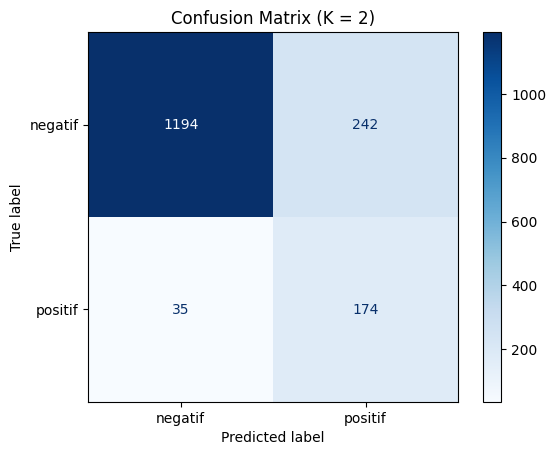

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Encode label
le = LabelEncoder()
y = le.fit_transform(labels)

# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Untuk menyimpan hasil tiap K
results = []

best_k = 1
best_acc = 0
best_preds = []
best_true = []
best_report = ""

# Loop dari K=1 hingga 40
for k in range(1, 41):
    all_preds = []
    all_true = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Oversampling dengan SMOTE
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        # Train KNN
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_res, y_train_res)
        y_pred = knn.predict(X_test)

        all_preds.extend(y_pred)
        all_true.extend(y_test)

    # Hitung metrik
    acc = accuracy_score(all_true, all_preds)
    prec = precision_score(all_true, all_preds, average='weighted', zero_division=0)
    rec = recall_score(all_true, all_preds, average='weighted')
    f1 = f1_score(all_true, all_preds, average='weighted')

    # Simpan ke list (semua dalam persen)
    results.append({
        'K': k,
        'Akurasi (%)': round(acc * 100, 2),
        'Presisi (%)': round(prec * 100, 2),
        'Recall (%)': round(rec * 100, 2),
        'F1-Score (%)': round(f1 * 100, 2)
    })

    # Simpan model terbaik
    if acc > best_acc:
        best_k = k
        best_acc = acc
        best_preds = all_preds.copy()
        best_true = all_true.copy()
        best_report = classification_report(best_true, best_preds, target_names=le.classes_)

# Simpan ke Excel
df_results = pd.DataFrame(results)
df_results.to_excel('/content/akurasi_knn_5komplit.xlsx', index=False)

# Output terbaik ke konsol
print(f"K terbaik: K={best_k}")
print(f"Akurasi: {best_acc * 100:.2f}%\n")
print("Laporan Klasifikasi (dengan SMOTE):")
print(best_report)


# Setelah best_report di-print
print(f"K terbaik: K={best_k}")
print(f"Akurasi: {best_acc * 100:.2f}%\n")
print("Laporan Klasifikasi (dengan SMOTE):")
print(best_report)

# Confusion Matrix
cm = confusion_matrix(best_true, best_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix (K = {best_k})")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Load data
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Encode label
le = LabelEncoder()
y = le.fit_transform(labels)

# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Kernel yang akan diuji
kernel_list = ['linear', 'rbf', 'poly']

# Simpan hasil semua kernel
all_results = []

# Simpan info model terbaik
best_model = ''
best_acc = 0
best_preds = []
best_true = []
best_report = ''

for kernel in kernel_list:
    all_preds = []
    all_true = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # SMOTE
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        # Train SVM
        svm = SVC(kernel=kernel, C=1)
        svm.fit(X_train_res, y_train_res)
        y_pred = svm.predict(X_test)

        all_preds.extend(y_pred)
        all_true.extend(y_test)

    # Hitung metrik
    acc = accuracy_score(all_true, all_preds)
    prec = precision_score(all_true, all_preds, average='weighted', zero_division=0)
    rec = recall_score(all_true, all_preds, average='weighted', zero_division=0)
    f1 = f1_score(all_true, all_preds, average='weighted', zero_division=0)

    all_results.append({
        'Kernel': kernel,
        'Akurasi (%)': round(acc * 100, 2),
        'Presisi (%)': round(prec * 100, 2),
        'Recall (%)': round(rec * 100, 2),
        'F1-Score (%)': round(f1 * 100, 2)
    })

    # Simpan model terbaik
    if acc > best_acc:
        best_model = kernel
        best_acc = acc
        best_preds = all_preds.copy()
        best_true = all_true.copy()
        best_report = classification_report(best_true, best_preds, target_names=le.classes_)

# Simpan ke Excel
df_results = pd.DataFrame(all_results, columns=['Kernel', 'Akurasi (%)', 'Presisi (%)', 'Recall (%)', 'F1-Score (%)'])
df_results.to_excel('/content/akurasi_svm_3kernel_10fold.xlsx', index=False)

# Output ke konsol
print(f"Kernel terbaik: {best_model}")
print(f"Akurasi: {best_acc * 100:.2f}%\n")
print("Laporan Klasifikasi (SVM dengan SMOTE):")
print(best_report)


Kernel terbaik: linear
Akurasi: 95.20%

Laporan Klasifikasi (SVM dengan SMOTE):
              precision    recall  f1-score   support

     negatif       0.97      0.97      0.97      1436
     positif       0.81      0.81      0.81       209

    accuracy                           0.95      1645
   macro avg       0.89      0.89      0.89      1645
weighted avg       0.95      0.95      0.95      1645




=== Linear ===
Akurasi Rata-rata (10-Fold): 0.952
Classification Report:
              precision    recall  f1-score   support

     negatif       0.97      0.97      0.97      1436
     positif       0.81      0.81      0.81       209

    accuracy                           0.95      1645
   macro avg       0.89      0.89      0.89      1645
weighted avg       0.95      0.95      0.95      1645



<Figure size 600x600 with 0 Axes>

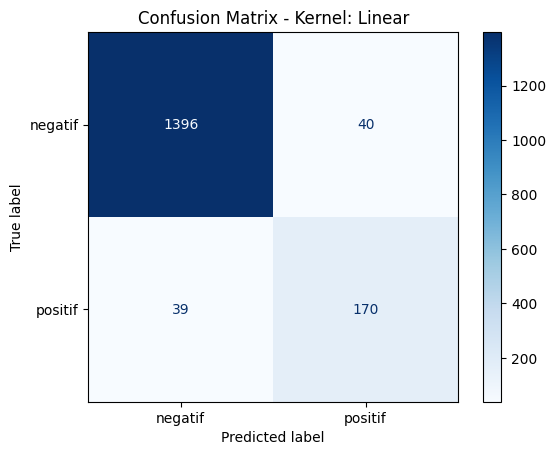


=== RBF ===
Akurasi Rata-rata (10-Fold): 0.9507
Classification Report:
              precision    recall  f1-score   support

     negatif       0.95      0.99      0.97      1436
     positif       0.93      0.67      0.77       209

    accuracy                           0.95      1645
   macro avg       0.94      0.83      0.87      1645
weighted avg       0.95      0.95      0.95      1645



<Figure size 600x600 with 0 Axes>

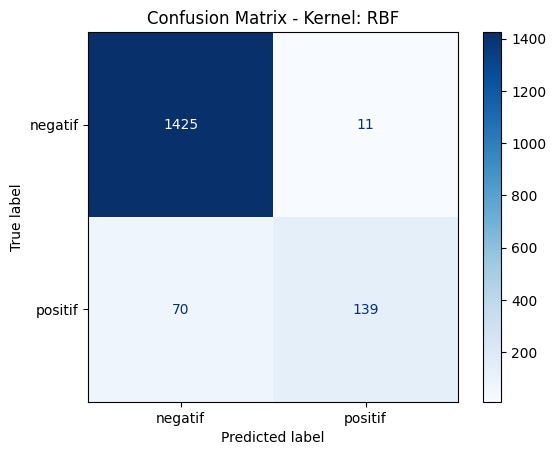


=== Polynomial ===
Akurasi Rata-rata (10-Fold): 0.9404
Classification Report:
              precision    recall  f1-score   support

     negatif       0.94      0.99      0.97      1436
     positif       0.91      0.59      0.72       209

    accuracy                           0.94      1645
   macro avg       0.92      0.79      0.84      1645
weighted avg       0.94      0.94      0.93      1645



<Figure size 600x600 with 0 Axes>

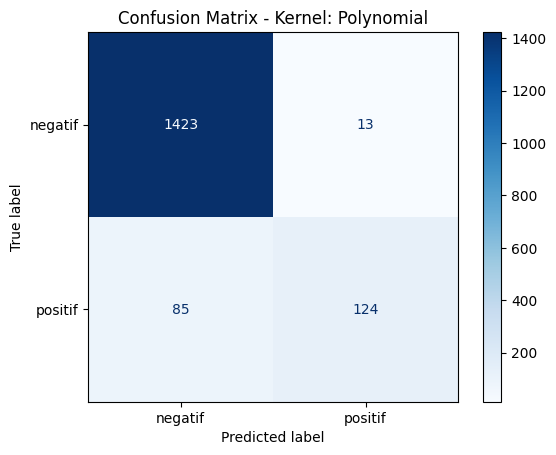

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')  # kolom: 'ulasan_bersih', 'label_sentimen'
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Encode label
le = LabelEncoder()
y = le.fit_transform(labels)

# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definisikan model SVM dengan 3 kernel
svm_models = {
    'Linear': SVC(kernel='linear', C=1),
    'RBF': SVC(kernel='rbf'),
    'Polynomial': SVC(kernel='poly')
}

# Simpan akurasi rata-rata tiap kernel
results = []

# Evaluasi tiap model
for kernel_name, model in svm_models.items():
    fold_accuracies = []
    all_preds = []
    all_true = []

    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # SMOTE
        smote = SMOTE(random_state=42)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        # Training dan prediksi
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)

        # Simpan akurasi per fold
        acc = accuracy_score(y_test, y_pred)
        fold_accuracies.append(acc)

        # Gabungkan prediksi
        all_preds.extend(y_pred)
        all_true.extend(y_test)

    # Hitung akurasi rata-rata
    avg_acc = round(sum(fold_accuracies) / len(fold_accuracies), 4)

    # Simpan hasil akurasi rata-rata
    results.append({'Kernel': kernel_name, 'Akurasi Rata-rata': avg_acc})

    # Classification Report
    print(f"\n=== {kernel_name} ===")
    print(f"Akurasi Rata-rata (10-Fold): {avg_acc}")
    print("Classification Report:")
    print(classification_report(all_true, all_preds, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(all_true, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

    # Plot
    plt.figure(figsize=(6, 6))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix - Kernel: {kernel_name}")
    plt.show()

# Simpan hasil akurasi ke Excel
df_results = pd.DataFrame(results)
df_results.to_excel('/content/akurasi_svm_10foldd.xlsx', index=False)


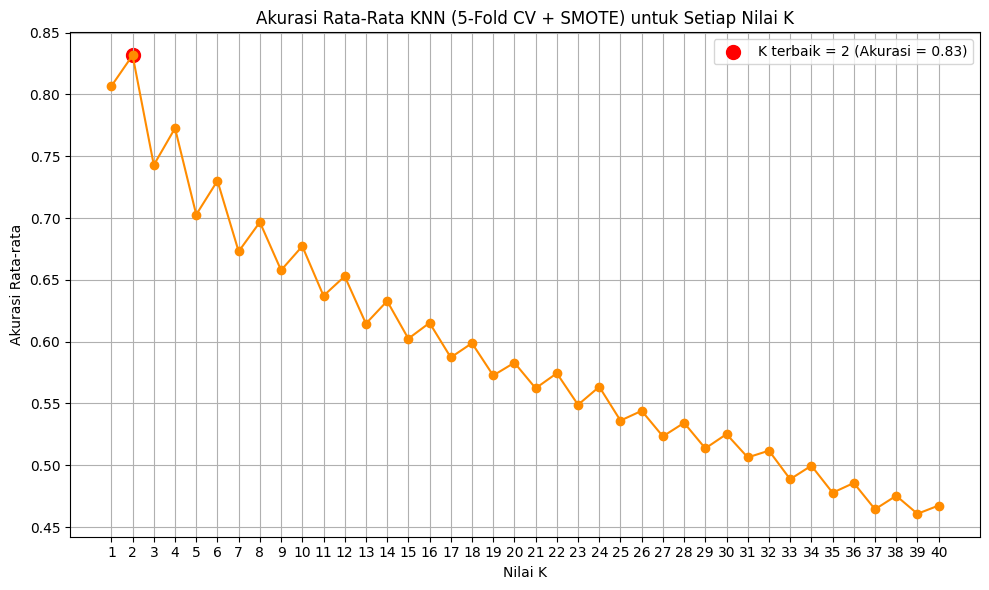

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("ulasan_linkaja_label&manualll.xlsx")  # Ganti sesuai file kamu
X = df['ulasan_bersih']
y = df['label_sentimen']

# TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Inisialisasi
k_values = list(range(1, 41))
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mean_accuracy_per_k = []

for k in k_values:
    fold_accuracies = []

    for train_index, test_index in kfold.split(X_tfidf, y):
        X_train_fold, X_test_fold = X_tfidf[train_index], X_tfidf[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # SMOTE
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # KNN
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_resampled, y_train_resampled)
        y_pred = knn.predict(X_test_fold)

        acc = accuracy_score(y_test_fold, y_pred)
        fold_accuracies.append(acc)

    mean_acc = np.mean(fold_accuracies)
    mean_accuracy_per_k.append(mean_acc)

# Nilai K terbaik
best_k = k_values[np.argmax(mean_accuracy_per_k)]
best_acc = max(mean_accuracy_per_k)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracy_per_k, marker='o', color='darkorange', linestyle='-')
plt.title('Akurasi Rata-Rata KNN (5-Fold CV + SMOTE) untuk Setiap Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi Rata-rata')
plt.xticks(k_values)
plt.grid(True)
plt.scatter(best_k, best_acc, color='red', s=100, label=f'K terbaik = {best_k} (Akurasi = {best_acc:.2f})')
plt.legend()
plt.tight_layout()
plt.show()


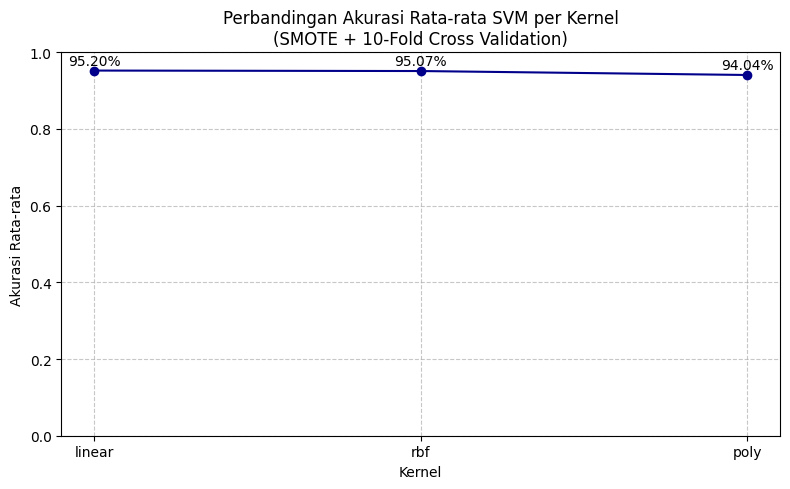

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("ulasan_linkaja_label&manualll.xlsx")  # Ganti sesuai file kamu
X = df['ulasan_bersih']
y = df['label_sentimen']

# TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# Daftar kernel
kernel_types = ['linear', 'rbf', 'poly']
mean_accuracy_per_kernel = {}

# Stratified 5-Fold Cross Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for kernel in kernel_types:
    fold_accuracies = []

    for train_idx, test_idx in skf.split(X_tfidf, y):
        X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # SMOTE hanya pada data latih
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # SVM dengan kernel yang diuji
        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train_resampled, y_train_resampled)
        y_pred = svm.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        fold_accuracies.append(acc)

    mean_accuracy = np.mean(fold_accuracies)
    mean_accuracy_per_kernel[kernel] = mean_accuracy

# Plot hasil akurasi
plt.figure(figsize=(8, 5))
kernels = list(mean_accuracy_per_kernel.keys())
accuracies = list(mean_accuracy_per_kernel.values())

plt.plot(kernels, accuracies, marker='o', linestyle='-', color='darkblue')
plt.title("Perbandingan Akurasi Rata-rata SVM per Kernel\n(SMOTE + 10-Fold Cross Validation)")
plt.xlabel("Kernel")
plt.ylabel("Akurasi Rata-rata")
plt.ylim(0.0, 1.0)
plt.grid(True, linestyle='--', alpha=0.7)

# Tambahkan label akurasi dalam persen 2 desimal (tanpa dibulatkan ke 95%)
for i, acc in enumerate(accuracies):
    acc_percent = acc * 100
    label = f"{acc_percent:.2f}%"  # Contoh: 94.89%
    plt.text(kernels[i], acc + 0.015, label, ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


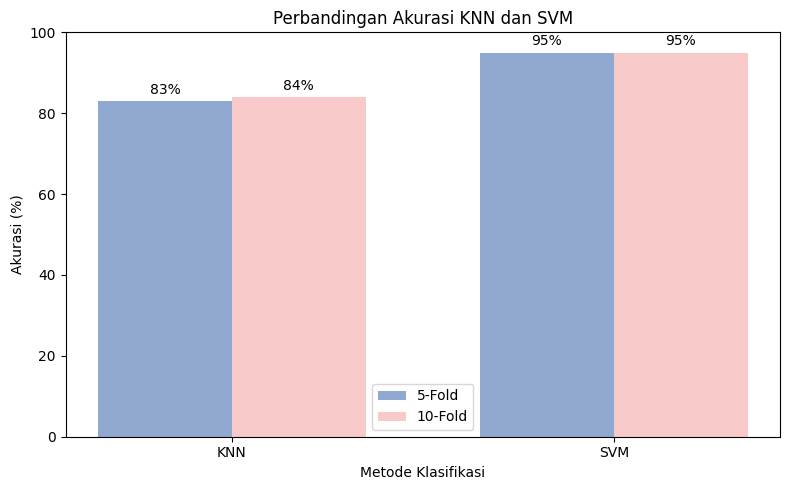

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data akurasi (misalnya hasil akhir dari eksperimen)
metode = ['KNN', 'SVM']
akurasi_5fold = [83, 95]   # Akurasi 5-fold untuk KNN dan SVM
akurasi_10fold = [84, 95]  # Akurasi 10-fold untuk KNN dan SVM

x = np.arange(len(metode))  # Label lokasi
width = 0.35  # Lebar bar

fig, ax = plt.subplots(figsize=(8, 5))
bar1 = ax.bar(x - width/2, akurasi_5fold, width, label='5-Fold', color='#91A8D0')
bar2 = ax.bar(x + width/2, akurasi_10fold, width, label='10-Fold', color='#F7CAC9')

# Label dan judul
ax.set_ylabel('Akurasi (%)')
ax.set_xlabel('Metode Klasifikasi')
ax.set_title('Perbandingan Akurasi KNN dan SVM')
ax.set_xticks(x)
ax.set_xticklabels(metode)
ax.set_ylim(0, 100)
ax.legend()

# Menambahkan label angka di atas bar
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


# KNN 90:10,80:20,70:30,60:40

In [ ]:
!pip install imbalanced-Learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

90:10

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi vektor TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji dengan rasio 90:10
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Inisialisasi variabel untuk menyimpan hasil terbaik
best_k = 1
best_acc = 0
best_report = ""
best_precision = 0
best_recall = 0
best_f1 = 0

# Melatih dan mengevaluasi model KNN untuk nilai K dari 1 hingga 40
for k in range(1, 41):
    # Inisialisasi model KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model pada data latih hasil oversampling
    knn.fit(X_train_res, y_train_res)
    # Melakukan prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)

    # Jika akurasi lebih baik dari sebelumnya, simpan hasilnya
    if acc > best_acc:
        best_k = k
        best_acc = acc
        best_report = classification_report(y_test, y_pred, target_names=le.classes_)
        best_precision = precision_score(y_test, y_pred, average='weighted')
        best_recall = recall_score(y_test, y_pred, average='weighted')
        best_f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil terbaik
print("===== Evaluasi Split 90:10 (KNN + SMOTE) =====")
print(f"K terbaik: {best_k}")
print(f"Akurasi: {best_acc:.2f}")
print(f"Presisi: {best_precision:.2f}")
print(f"Recall: {best_recall:.2f}")
print(f"F1-Score: {best_f1:.2f}")
print("\nLaporan Klasifikasi (dengan SMOTE):")
print(best_report)


===== Evaluasi Split 90:10 (KNN + SMOTE) =====
K terbaik: 2
Akurasi: 0.82
Presisi: 0.89
Recall: 0.82
F1-Score: 0.84

Laporan Klasifikasi (dengan SMOTE):
              precision    recall  f1-score   support

     negatif       0.97      0.82      0.89       144
     positif       0.40      0.81      0.53        21

    accuracy                           0.82       165
   macro avg       0.68      0.81      0.71       165
weighted avg       0.89      0.82      0.84       165



80:20

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi vektor TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji dengan rasio 90:10
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Inisialisasi variabel untuk menyimpan hasil terbaik
best_k = 1
best_acc = 0
best_report = ""
best_precision = 0
best_recall = 0
best_f1 = 0

# Melatih dan mengevaluasi model KNN untuk nilai K dari 1 hingga 40
for k in range(1, 41):
    # Inisialisasi model KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model pada data latih hasil oversampling
    knn.fit(X_train_res, y_train_res)
    # Melakukan prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)

    # Jika akurasi lebih baik dari sebelumnya, simpan hasilnya
    if acc > best_acc:
        best_k = k
        best_acc = acc
        best_report = classification_report(y_test, y_pred, target_names=le.classes_)
        best_precision = precision_score(y_test, y_pred, average='weighted')
        best_recall = recall_score(y_test, y_pred, average='weighted')
        best_f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil terbaik
print("===== Evaluasi Split 80:20 (KNN + SMOTE) =====")
print(f"K terbaik: {best_k}")
print(f"Akurasi: {best_acc:.2f}")
print(f"Presisi: {best_precision:.2f}")
print(f"Recall: {best_recall:.2f}")
print(f"F1-Score: {best_f1:.2f}")
print("\nLaporan Klasifikasi (dengan SMOTE):")
print(best_report)


===== Evaluasi Split 80:20 (KNN + SMOTE) =====
K terbaik: 2
Akurasi: 0.82
Presisi: 0.90
Recall: 0.82
F1-Score: 0.85

Laporan Klasifikasi (dengan SMOTE):
              precision    recall  f1-score   support

     negatif       0.97      0.83      0.89       287
     positif       0.40      0.81      0.54        42

    accuracy                           0.82       329
   macro avg       0.69      0.82      0.72       329
weighted avg       0.90      0.82      0.85       329



70:30

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi vektor TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji dengan rasio 90:10
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Inisialisasi variabel untuk menyimpan hasil terbaik
best_k = 1
best_acc = 0
best_report = ""
best_precision = 0
best_recall = 0
best_f1 = 0

# Melatih dan mengevaluasi model KNN untuk nilai K dari 1 hingga 40
for k in range(1, 41):
    # Inisialisasi model KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model pada data latih hasil oversampling
    knn.fit(X_train_res, y_train_res)
    # Melakukan prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)

    # Jika akurasi lebih baik dari sebelumnya, simpan hasilnya
    if acc > best_acc:
        best_k = k
        best_acc = acc
        best_report = classification_report(y_test, y_pred, target_names=le.classes_)
        best_precision = precision_score(y_test, y_pred, average='weighted')
        best_recall = recall_score(y_test, y_pred, average='weighted')
        best_f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil terbaik
print("===== Evaluasi Split 70:30 (KNN + SMOTE) =====")
print(f"K terbaik: {best_k}")
print(f"Akurasi: {best_acc:.2f}")
print(f"Presisi: {best_precision:.2f}")
print(f"Recall: {best_recall:.2f}")
print(f"F1-Score: {best_f1:.2f}")
print("\nLaporan Klasifikasi (dengan SMOTE):")
print(best_report)


===== Evaluasi Split 70:30 (KNN + SMOTE) =====
K terbaik: 2
Akurasi: 0.83
Presisi: 0.89
Recall: 0.83
F1-Score: 0.85

Laporan Klasifikasi (dengan SMOTE):
              precision    recall  f1-score   support

     negatif       0.97      0.83      0.89       431
     positif       0.41      0.79      0.54        63

    accuracy                           0.83       494
   macro avg       0.69      0.81      0.72       494
weighted avg       0.89      0.83      0.85       494



60:40

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi vektor TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji dengan rasio 90:10
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Inisialisasi variabel untuk menyimpan hasil terbaik
best_k = 1
best_acc = 0
best_report = ""
best_precision = 0
best_recall = 0
best_f1 = 0

# Melatih dan mengevaluasi model KNN untuk nilai K dari 1 hingga 40
for k in range(1, 41):
    # Inisialisasi model KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    # Melatih model pada data latih hasil oversampling
    knn.fit(X_train_res, y_train_res)
    # Melakukan prediksi pada data uji
    y_pred = knn.predict(X_test)
    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)

    # Jika akurasi lebih baik dari sebelumnya, simpan hasilnya
    if acc > best_acc:
        best_k = k
        best_acc = acc
        best_report = classification_report(y_test, y_pred, target_names=le.classes_)
        best_precision = precision_score(y_test, y_pred, average='weighted')
        best_recall = recall_score(y_test, y_pred, average='weighted')
        best_f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil terbaik
print("===== Evaluasi Split 60:40 (KNN + SMOTE) =====")
print(f"K terbaik: {best_k}")
print(f"Akurasi: {best_acc:.2f}")
print(f"Presisi: {best_precision:.2f}")
print(f"Recall: {best_recall:.2f}")
print(f"F1-Score: {best_f1:.2f}")
print("\nLaporan Klasifikasi (dengan SMOTE):")
print(best_report)


===== Evaluasi Split 60:40 (KNN + SMOTE) =====
K terbaik: 2
Akurasi: 0.82
Presisi: 0.89
Recall: 0.82
F1-Score: 0.84

Laporan Klasifikasi (dengan SMOTE):
              precision    recall  f1-score   support

     negatif       0.97      0.82      0.89       144
     positif       0.40      0.81      0.53        21

    accuracy                           0.82       165
   macro avg       0.68      0.81      0.71       165
weighted avg       0.89      0.82      0.84       165



# SVM 90:10,80:20,70:30,60:40

In [ ]:
!pip install imbalanced-Learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

**90:10 linear**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel linear
clf_linear = SVC(kernel='linear', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_linear.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_linear = clf_linear.predict(X_test)

# Menghitung akurasi
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel Accuracy (with SMOTE): {accuracy_linear:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_linear, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_linear, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_linear, average='weighted')
print(f"F1-Score: {f1:.2f}")


Linear Kernel Accuracy (with SMOTE): 0.96
Presisi: 0.96
Recall: 0.96
F1-Score: 0.96


**80:20 linear**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel linear
clf_linear = SVC(kernel='linear', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_linear.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_linear = clf_linear.predict(X_test)

# Menghitung akurasi
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel Accuracy (with SMOTE): {accuracy_linear:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_linear, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_linear, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_linear, average='weighted')
print(f"F1-Score: {f1:.2f}")


Linear Kernel Accuracy (with SMOTE): 0.96
Presisi: 0.96
Recall: 0.96
F1-Score: 0.96


**70:30 linear**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel linear
clf_linear = SVC(kernel='linear', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_linear.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_linear = clf_linear.predict(X_test)

# Menghitung akurasi
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel Accuracy (with SMOTE): {accuracy_linear:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_linear, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_linear, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_linear, average='weighted')
print(f"F1-Score: {f1:.2f}")


Linear Kernel Accuracy (with SMOTE): 0.96
Presisi: 0.96
Recall: 0.96
F1-Score: 0.96


**60:40 linear**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel linear
clf_linear = SVC(kernel='linear', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_linear.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_linear = clf_linear.predict(X_test)

# Menghitung akurasi
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear Kernel Accuracy (with SMOTE): {accuracy_linear:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_linear, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_linear, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_linear, average='weighted')
print(f"F1-Score: {f1:.2f}")


Linear Kernel Accuracy (with SMOTE): 0.95
Presisi: 0.95
Recall: 0.95
F1-Score: 0.95


**90:10 rbf**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel RBF
clf_rbf = SVC(kernel='rbf', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_rbf.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_rbf = clf_rbf.predict(X_test)

# Menghitung akurasi
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel Accuracy (with SMOTE): {accuracy_rbf:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_rbf, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_rbf, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_rbf, average='weighted')
print(f"F1-Score: {f1:.2f}")


RBF Kernel Accuracy (with SMOTE): 0.96
Presisi: 0.96
Recall: 0.96
F1-Score: 0.96


**80:20 rbf**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel RBF
clf_rbf = SVC(kernel='rbf', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_rbf.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_rbf = clf_rbf.predict(X_test)

# Menghitung akurasi
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel Accuracy (with SMOTE): {accuracy_rbf:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_rbf, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_rbf, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_rbf, average='weighted')
print(f"F1-Score: {f1:.2f}")


RBF Kernel Accuracy (with SMOTE): 0.97
Presisi: 0.97
Recall: 0.97
F1-Score: 0.97


**70:30 rbf**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel RBF
clf_rbf = SVC(kernel='rbf', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_rbf.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_rbf = clf_rbf.predict(X_test)

# Menghitung akurasi
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel Accuracy (with SMOTE): {accuracy_rbf:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_rbf, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_rbf, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_rbf, average='weighted')
print(f"F1-Score: {f1:.2f}")


RBF Kernel Accuracy (with SMOTE): 0.96
Presisi: 0.96
Recall: 0.96
F1-Score: 0.96


**60:40 rbf**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel RBF
clf_rbf = SVC(kernel='rbf', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_rbf.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_rbf = clf_rbf.predict(X_test)

# Menghitung akurasi
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel Accuracy (with SMOTE): {accuracy_rbf:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_rbf, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_rbf, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_rbf, average='weighted')
print(f"F1-Score: {f1:.2f}")


RBF Kernel Accuracy (with SMOTE): 0.96
Presisi: 0.96
Recall: 0.96
F1-Score: 0.95


**90:10 poly**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel Polynomial
clf_poly = SVC(kernel='poly', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_poly.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_poly = clf_poly.predict(X_test)

# Menghitung akurasi
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial Kernel Accuracy (with SMOTE): {accuracy_poly:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_poly, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_poly, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_poly, average='weighted')
print(f"F1-Score: {f1:.2f}")


Polynomial Kernel Accuracy (with SMOTE): 0.95
Presisi: 0.94
Recall: 0.95
F1-Score: 0.94


**80:20 poly**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel Polynomial
clf_poly = SVC(kernel='poly', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_poly.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_poly = clf_poly.predict(X_test)

# Menghitung akurasi
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial Kernel Accuracy (with SMOTE): {accuracy_poly:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_poly, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_poly, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_poly, average='weighted')
print(f"F1-Score: {f1:.2f}")


Polynomial Kernel Accuracy (with SMOTE): 0.95
Presisi: 0.95
Recall: 0.95
F1-Score: 0.95


**70:30 poly**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel Polynomial
clf_poly = SVC(kernel='poly', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_poly.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_poly = clf_poly.predict(X_test)

# Menghitung akurasi
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial Kernel Accuracy (with SMOTE): {accuracy_poly:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_poly, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_poly, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_poly, average='weighted')
print(f"F1-Score: {f1:.2f}")


Polynomial Kernel Accuracy (with SMOTE): 0.95
Presisi: 0.95
Recall: 0.95
F1-Score: 0.95


**60:40 poly**

In [ ]:
# Membaca data dari file Excel
df = pd.read_excel('/content/ulasan_linkaja_label&manualll.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Mengubah label menjadi angka
le = LabelEncoder()
y = le.fit_transform(labels)

# Mengubah teks menjadi representasi vektor menggunakan TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Membagi data menjadi data latih dan data uji (60:40)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Melakukan oversampling pada data latih menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi model SVM dengan kernel Polynomial
clf_poly = SVC(kernel='poly', random_state=42)
# Melatih model menggunakan data latih hasil SMOTE
clf_poly.fit(X_train_smote, y_train_smote)
# Melakukan prediksi pada data uji
y_pred_poly = clf_poly.predict(X_test)

# Menghitung akurasi
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial Kernel Accuracy (with SMOTE): {accuracy_poly:.2f}")

# Menghitung presisi
precision = precision_score(y_test, y_pred_poly, average='weighted')
print(f"Presisi: {precision:.2f}")

# Menghitung recall
recall = recall_score(y_test, y_pred_poly, average='weighted')
print(f"Recall: {recall:.2f}")

# Menghitung F1-score
f1 = f1_score(y_test, y_pred_poly, average='weighted')
print(f"F1-Score: {f1:.2f}")


Polynomial Kernel Accuracy (with SMOTE): 0.95
Presisi: 0.95
Recall: 0.95
F1-Score: 0.94


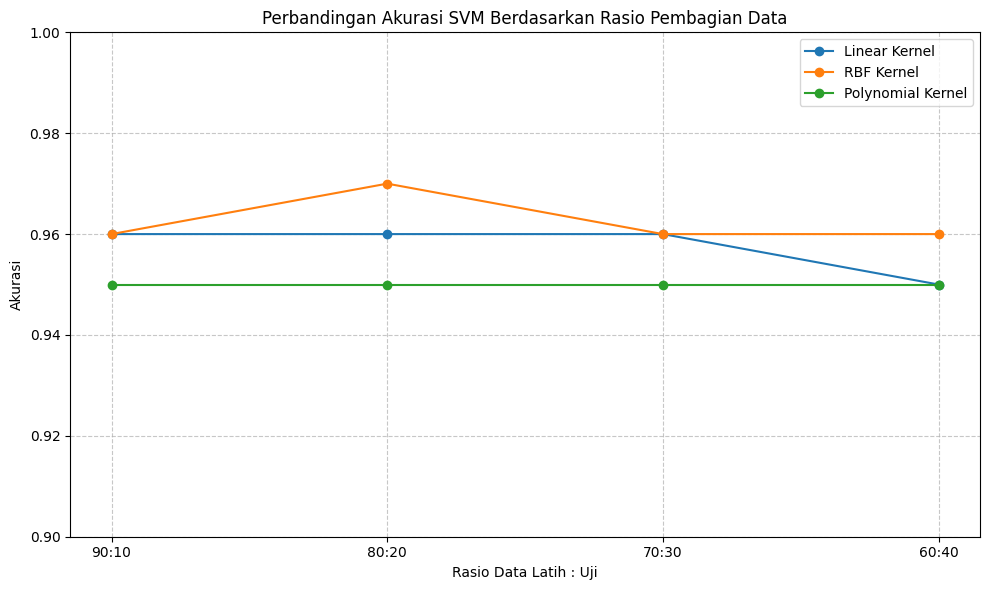

In [ ]:
import matplotlib.pyplot as plt

# Rasio pembagian data
ratios = ['90:10', '80:20', '70:30', '60:40']

# Akurasi masing-masing kernel SVM berdasarkan rasio
linear_acc = [0.96, 0.96, 0.96, 0.95]
rbf_acc = [0.96, 0.97, 0.96, 0.96]
poly_acc = [0.95, 0.95, 0.95, 0.95]

# Membuat plot garis
plt.figure(figsize=(10, 6))
plt.plot(ratios, linear_acc, marker='o', label='Linear Kernel')
plt.plot(ratios, rbf_acc, marker='o', label='RBF Kernel')
plt.plot(ratios, poly_acc, marker='o', label='Polynomial Kernel')

# Tambahan styling
plt.title('Perbandingan Akurasi SVM Berdasarkan Rasio Pembagian Data')
plt.xlabel('Rasio Data Latih : Uji')
plt.ylabel('Akurasi')
plt.ylim(0.90, 1.00)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Tampilkan plot
plt.show()


Akurasi Data Latih (SMOTE): 0.99
Akurasi Data Uji          : 0.96

Classification Report (Uji):
              precision    recall  f1-score   support

     negatif       0.98      0.97      0.98       291
     positif       0.79      0.87      0.83        39

    accuracy                           0.96       330
   macro avg       0.89      0.92      0.90       330
weighted avg       0.96      0.96      0.96       330



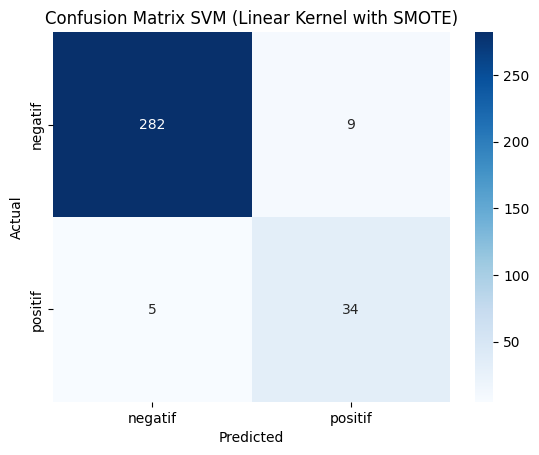

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('/content/ulasan_linkaja_label+manual.xlsx')
texts = df['ulasan_bersih']
labels = df['label_sentimen']

# Encode label
le = LabelEncoder()
y = le.fit_transform(labels)

# TF-IDF vektorisasi
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(texts)

# Split data (misalnya 90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Terapkan SMOTE hanya ke data latih
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Latih model SVM linear
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_res, y_train_res)

# Prediksi di data latih dan data uji
y_train_pred = model.predict(X_train_res)
y_test_pred = model.predict(X_test)

# Evaluasi akurasi
train_acc = accuracy_score(y_train_res, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Akurasi Data Latih (SMOTE): {train_acc:.2f}")
print(f"Akurasi Data Uji          : {test_acc:.2f}")

# Laporan klasifikasi
print("\nClassification Report (Uji):")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM (Linear Kernel with SMOTE)')
plt.show()
